## Continuación Regresión Lineal

Ejemplo: Predicción precio de casa, utilizaremos datos del condado de King, Georgia, USA. El set de datos contiene 21 variables, pero no todas serán usadas en este ejempl. La idea seleccionar las n variables que mejor ajusten un modelo de regresión lineal múltiple. Además de esto, obtendremos algunas metricas interesantes.

Fuente: https://www.kaggle.com/datasets/shivachandel/kc-house-data

In [10]:
import pandas as pd
housing_df = pd.read_csv("kc_house_data.csv")

housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
len(housing_df)

21613

In [9]:
from itertools import combinations

# supongamos que tenemos 6 variables y queremos buscar el mejor 
# modelo con 3 variables, podriamos probar todas las opciones
lista = list(range(6))
comb = combinations(lista, 3)
for i in comb:
    print(i)

(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 3, 4)
(0, 3, 5)
(0, 4, 5)
(1, 2, 3)
(1, 2, 4)
(1, 2, 5)
(1, 3, 4)
(1, 3, 5)
(1, 4, 5)
(2, 3, 4)
(2, 3, 5)
(2, 4, 5)
(3, 4, 5)


In [12]:
# Definir las variables independientes y dependiente
X = housing_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'zipcode']]
y = housing_df['price']

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Y generamos un obtejo de LinearRegressión

In [14]:
lr.fit(X, y.values)

LinearRegression()

In [20]:
y_hat = lr.predict(X)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_hat)
mae = mean_absolute_error(y, y_hat)
r2= r2_score(y, y_hat)

print(f'MSE      = {mse:6.2f}\nMAE      = {mae:6.2f}\nR2 Score = {r2:6.2f}')

MSE      = 64246672926.42
MAE      = 166734.31
R2 Score =   0.52


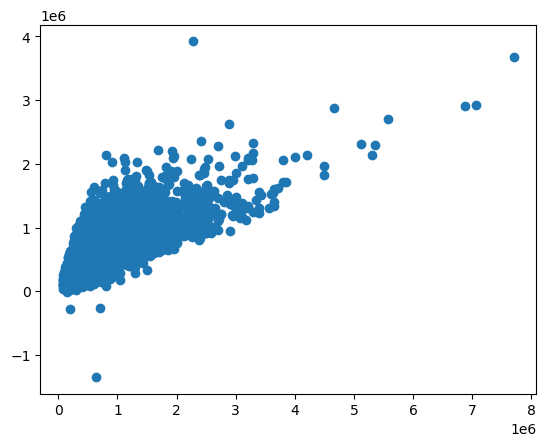

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y, y_hat)
plt.show()

### Desafio Regresión lineal múltiple.

Usted debe el dataset “Retail Insights: A Comprehensive Sales Dataset” para construir un modelo de regresión lineal múltiple con el objetivo de predecir las ventas totales de un pedido (order_total o total) a partir de variables explicativas disponibles. Deberá explorar, limpiar y transformar los datos (curso preparación de datos), seleccionar variables predictoras de acuerdo al algoritmo SFFS, entrenar el modelo, evaluarlo y entregar un informe con sus hallazgos.

https://www.kaggle.com/datasets/rajneesh231/retail-insights-a-comprehensive-sales-dataset

De ahi debe descargar los datos, si se mete en **code**, puede revisar una regresión hecha por la comunidad, esto le puede ayudar en la lectura y comprensión de los datos, sin embargo debe aplicar el siguiente algoritmo como su tarea:

Algoritmo de __Step Forward Feature Selection__ (**SFFS**). La idea de este algoritmo es agregar de a 1 en 1 las variables existentes en nuestro set de datos y ver como mejora el proceso de ajuste de la regresión lineal.

1. De las posibles variables consideradas en un principio (la cual llamaremos $m$), entrene $m$ modelos de regresión lineal (uno por cada variable), y seleccione la variable que obtenga un mejor $MAE$.

2. Con la variable seleccionada, remuévala del conjunto de posibles variables y guárdela en una lista de variables seleccionadas (`selected_vars`)

3. Del conjunto de posibles variables restantes, entrene $m-len(selected\_vars)$ modelos de regresión lineal utilizando las variables restantes en conjunto con `selected_vars`. Seleccione la nueva variable que obtenga un mejor $MAE$. Repita el paso 2. hasta que no quede ninguna variable.

4. Finalmente, con el procedimiento realizado, y ninguna variable restante en el conjunto de posible variable, imprima por pantalla el mejor conjunto de variables junto con su $MAE$. Adicionalmente, puede graficar la curva de cómo va evolucionando el $MAE$ a medida que va agregando variables.

**Nota:** Para el desafío, es recomendable utilizar `LinearRegression` de `scikit-learn` por temas de facilidad de implementación del algoritmo de __Step Forward Feature Selection__. Para poder obtener el $\hat{Y}$ utilizando `LinearRegression`, se debe utilizar el método `.predict(X)` posteriormente a haber ajustado el modelo (`.fit(X,y)`), y este computara:

$$\hat{Y}=\hat{\beta_0}+X_1\hat{\beta_1}+X_2\hat{\beta_2}+\dots+X_m\hat{\beta_m}$$

Ejemplo de uso:

```python
lr = LinearRegression()
lr.fit(X,y)
y_hat = lr.predict(X)
```